### Carzam
Trying to do transfer learning on the Vgg16 model for predicting car make/model.

In [1]:
import os

import keras
from keras.preprocessing import image

from matplotlib import pyplot as plt
import numpy as np
from numpy.random import permutation
np.set_printoptions(precision=4, linewidth=100)

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Contains some utilty functions
# TODO Figure out what "reload" does
import utils; reload(utils)
from utils import plots
# Contains the trained Vgg16 model (2014 winner of ImageNet)
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [5]:
path = "../data/carzam/"
# path = "../data/carzam/sample/"
# Path containing trained models
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [12]:
# For showing the plots in this webpage
%matplotlib inline

In [6]:
# If running out of memory or using an older GPU, decrease this number
batch_size = 4

In [7]:
vgg = Vgg16()
# Grab a few images at a time for training and validation
# batches = vgg.get_batches(path+'train', batch_size=batch_size)
# val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

32768/35363 [==========================>...] - ETA: 0s

In [9]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 173 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [21]:
imgs, labels = next(batches)

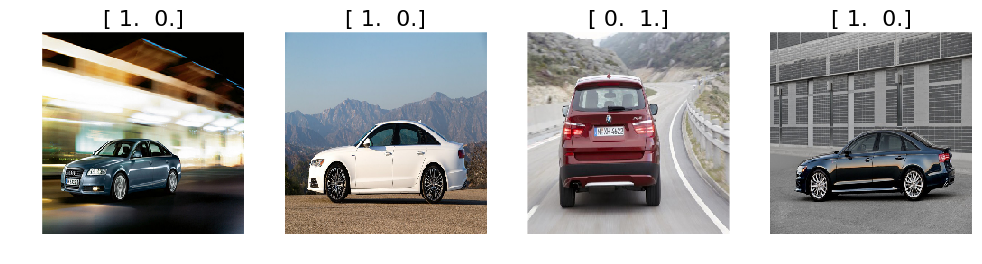

In [22]:
plots(imgs, titles=labels)

In [14]:
vgg.finetune(batches)

In [15]:
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
173/173 [==============================] - 5s - loss: 1.2929 - acc: 0.5665 - val_loss: 0.5379 - val_acc: 0.8182
Epoch 2/5
173/173 [==============================] - 5s - loss: 0.6639 - acc: 0.8092 - val_loss: 1.0425 - val_acc: 0.7727
Epoch 3/5
173/173 [==============================] - 5s - loss: 0.5511 - acc: 0.8208 - val_loss: 0.6748 - val_acc: 0.8636
Epoch 4/5
173/173 [==============================] - 5s - loss: 0.3846 - acc: 0.8786 - val_loss: 0.4701 - val_acc: 0.8636
Epoch 5/5
173/173 [==============================] - 5s - loss: 0.4327 - acc: 0.8555 - val_loss: 0.4046 - val_acc: 0.8636


In [16]:
vgg.model.save_weights(model_path+'finetune_5_epochs.h5')

In [17]:
val_batches, probs = vgg.test(path+'valid', batch_size=batch_size)
labels = val_batches.classes
filenames = val_batches.filenames
# Pick the first column, which in this case would represent probability of the image being a cat
probs = probs[:,0]  
# If the probability of it being a cat is high then assign class label 1 else assign class label 0
preds = np.round(1-probs)

Found 22 images belonging to 2 classes.


In [18]:
probs

array([  9.9897e-01,   4.2836e-02,   9.9990e-01,   9.9999e-01,   9.9973e-01,   9.9999e-01,
         1.0000e+00,   9.3743e-01,   9.9972e-01,   1.1049e-01,   9.9998e-01,   9.8591e-03,
         6.6188e-02,   2.2914e-01,   4.0007e-04,   3.8283e-01,   2.9383e-01,   9.2725e-01,
         9.9918e-01,   3.6212e-02,   4.3265e-01,   1.0568e-03], dtype=float32)

In [19]:
preds

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.], dtype=float32)

In [23]:
vgg.predict(imgs, True)

(array([ 1.    ,  0.9997,  0.8255,  0.9997], dtype=float32),
 array([0, 0, 1, 0]),
 ['audi_a6', 'audi_a6', 'bmw_x3', 'audi_a6'])